# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import loguniform

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

A pesar de que en la información de la base dice que tiene 5960 esntradas, se trata del registro de 1854 créditos hipotecarios recientes, entre los cuales un porcentaje (20% en la base original) terminó con solicitantes que finalmente incumplieron el pago del préstamo o cometieron retrasos importantes. Estos datos se utilizarán para entrenar un modelo de score crediticio.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo que hay que predecir está denominada como "TARGET", en la cual se clasifica al cliente en dos subgrupos:
 - 0: el cliente cumplió y pagó el préstamo
 - 1: el cliente incumplió

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Para hacer la predicción hay disponibles 10 atributos:
- LOAN    cantidad de dinero requerido en el préstamo
- MORTDUE cantidad adeudada en la hipoteca existente
- VALUE   valor de la propiedad
- YOJ     años en el trabajo actual
- DEROG   cantidad de reportes de degradación del score crediticio importantes
- DELINQ  cantidad de líneas de crédito morosas
- CLAGE   antigüedad de la última actividad comercial (trade line) en meses
- NINQ    cantidad de líneas de crédito recientes
- CLNO    cantidad de líneas de crédito
- DEBTINC relación deuda-ingresos

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Los más determinantes creemos que son:
- DEROG   cantidad de reportes de degradación del score crediticio importantes
- DEBTINC relación deuda-ingresos
- DELINQ  cantidad de líneas de crédito morosas
- NINQ    cantidad de líneas de crédito recientes

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

La división de los datos de entrenamiento y evaluación ya fue hecha al momento de cargar los datos, por lo que vamos directamente con el clasificador.
La semilla va fijada en un 46 para que el algoritmo pueda ser replicado.

In [5]:
model = SGDClassifier(random_state=46)

#Entrenamiento
model.fit(X_train, y_train)

#Predicciones
train_prediction_SGDC = model.predict(X_train)
test_prediction_SGDC = model.predict(X_test)

Generamos los resultados de accuracy, precision, recall, F1 y matriz de confusión

In [6]:
#Conjunto de entrenamiento
train_accuracy_SGDC = accuracy_score(y_train, train_prediction_SGDC)
train_precision_SGDC = precision_score(y_train, train_prediction_SGDC)
train_recall_SGDC = recall_score(y_train, train_prediction_SGDC)
train_f1_SGDC = f1_score(y_train, train_prediction_SGDC)
train_confusion_matrix_SGDC = confusion_matrix(y_train, train_prediction_SGDC)

#Conjunto de evaluación
test_accuracy_SGDC = accuracy_score(y_test, test_prediction_SGDC)
test_precision_SGDC = precision_score(y_test, test_prediction_SGDC)
test_recall_SGDC = recall_score(y_test, test_prediction_SGDC)
test_f1_SGDC = f1_score(y_test, test_prediction_SGDC)
test_confusion_matrix_SGDC = confusion_matrix(y_test, test_prediction_SGDC)

Por último, imprimimos las métricas para poder compararlas. Mostramos el número con dos decimales. Si se quiere más precisión puede cambiarse el atributo '0.2'

In [7]:
print("Resultados de las métricas:")
print(f"Train accuracy: {train_accuracy_SGDC:0.2}")
print(f"Test accuracy: {test_accuracy_SGDC:0.2}")
print("\n")
print(f"Train precision: {train_precision_SGDC:0.2}")
print(f"Test precision: {test_precision_SGDC:0.2}")
print("\n")
print(f"Train recall: {train_recall_SGDC:0.2}")
print(f"Test recall: {test_recall_SGDC:0.2}")
print("\n")
print(f"Train F1: {train_f1_SGDC:0.2}")
print(f"Test F1: {test_f1_SGDC:0.2}")
print("\n")
print("Matriz de confusión TRAIN:")
print(train_confusion_matrix_SGDC)
print("\n")
print("Matriz de confusión TEST:")
print(test_confusion_matrix_SGDC)

Resultados de las métricas:
Train accuracy: 0.76
Test accuracy: 0.77


Train precision: 0.18
Test precision: 0.19


Train recall: 0.12
Test recall: 0.14


Train F1: 0.14
Test F1: 0.16


Matriz de confusión TRAIN:
[[1094  138]
 [ 221   30]]


Matriz de confusión TEST:
[[278  35]
 [ 50   8]]


A partir de estos resultados, podemos observar que la exactitud del método no es mala, sin embargo, la precisión, sensibilidad y f1 sí lo son ya que se encuentran bastante alejados de 1. Por lo tanto, podemos decir que el método no es muy bueno.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Se seleccionaron diferentes valores para ajustar los hiperparámetros principales del SGDClassifier. Tanto para loss como como para learning_rate probamos todas las funciones que están descriptas en la documentación y elegimos las que mejores resultados nos ofrecen. Se define eta0 —tasa de aprendizaje incial— como > 0 para evitar errores en el clasificador y los alphas en rango de 0.0001-0.001 ya que son valores cercanos al valor por defecto.

Para ajustarlos, usamos grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar varias combinaciones posibles de valores.

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [24]:
parameters = {
      'loss': ['hinge', 'log_loss', 'squared_hinge', 'perceptron',],
      'learning_rate': ['adaptive', 'optimal', 'constant'],
      'alpha': [ 0.0001, 0.00016, 0.0002, 0.0004,],
      'eta0': [ 0.0001, 0.0005, 0.0008, 0.001]
},

grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtenemos los distintos resultados que nos interesan
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
results = grid_search.cv_results_

A continuación, se encuentran los valores de accuracy promedio y varianza para todas las configuraciones:

In [25]:
# Promedio y la varianza para todas las configuraciones
mean_scores = results['mean_test_score']
var_scores = results['std_test_score'] ** 2

for mean, var, params in zip(mean_scores, var_scores, results['params']):
    print("Hiperparámetros:", params)
    print("Accuracy promedio:", mean)
    print("Varianza:", var)
    print("-------------------------------------------")
    print("\n")

Hiperparámetros: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'loss': 'hinge'}
Accuracy promedio: 0.8267085267085268
Varianza: 5.960456274406586e-05
-------------------------------------------


Hiperparámetros: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'loss': 'log_loss'}
Accuracy promedio: 0.8253594503594505
Varianza: 7.697888078268459e-05
-------------------------------------------


Hiperparámetros: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'loss': 'squared_hinge'}
Accuracy promedio: 0.637082537082537
Varianza: 0.060426890999736575
-------------------------------------------


Hiperparámetros: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'loss': 'perceptron'}
Accuracy promedio: 0.8267085267085268
Varianza: 5.960456274406586e-05
-------------------------------------------


Hiperparámetros: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge'}
Accuracy promedio: 0.8307489307489307


¿Cuál fue la mejor precisión?¿Para qué hiperparámetros?
En general, hemos encontrado mejores resultados cuando alpha y eta0 se achican

In [26]:
print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_params)

Mejor modelo: SGDClassifier(eta0=0.0001, random_state=46)
Mejores hiperparámetros: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge'}




Para la mejor configuración encontrada, entrenamos nuevamente con los datos de training y generamos los resultados de accuracy, precision, recall, F1 y matriz de confusión

In [27]:
# Mejor configuración encontrada en el conjunto de entrenamiento

best_model.fit(X_train, y_train)
train_predictions_SGDC_hyper = best_model.predict(X_train)
train_accuracy_SGDC_hyper = accuracy_score(y_train, train_predictions_SGDC_hyper)
train_precision_SGDC_hyper = precision_score(y_train, train_predictions_SGDC_hyper)
train_recall_SGDC_hyper = recall_score(y_train, train_predictions_SGDC_hyper)
train_f1_SGDC_hyper = f1_score(y_train, train_predictions_SGDC_hyper)
train_confusion_matrix_SGDC_hyper = confusion_matrix(y_train, train_predictions_SGDC_hyper)

# Mejor configuración encontrada en el conjunto de evaluación
test_predictions_SGDC_hyper = best_model.predict(X_test)
test_accuracy_SGDC_hyper = accuracy_score(y_test, test_predictions_SGDC_hyper)
test_precision_SGDC_hyper = precision_score(y_test, test_predictions_SGDC_hyper)
test_recall_SGDC_hyper = recall_score(y_test, test_predictions_SGDC_hyper)
test_f1_SGDC_hyper = f1_score(y_test, test_predictions_SGDC_hyper)
test_confusion_matrix_SGDC_hyper = confusion_matrix(y_test, test_predictions_SGDC_hyper)



In [29]:
print(f"Train accuracy post ajuste: {train_accuracy_SGDC_hyper:0.2}, Train accuracy anterior: {train_accuracy_SGDC:0.2} ")
print(f"Test accuracy post ajuste: {test_accuracy_SGDC_hyper:0.2}, Test accuracy anterior: {test_accuracy_SGDC:0.2} ")
print("\n")
print(f"Train precision post ajuste: {train_precision_SGDC_hyper:0.2}, Train precision anterior: {train_precision_SGDC:0.2}")
print(f"Test precision post ajuste: {test_precision_SGDC_hyper:0.2}, Test precision anterior: {test_precision_SGDC:0.2}")
print("\n")
print(f"Train recall post ajuste: {train_recall_SGDC_hyper:0.2}, Train recall anterior: {train_recall_SGDC:0.2}")
print(f"Test recall post ajuste: {test_recall_SGDC_hyper:0.2}, Test recall anterior: {train_recall_SGDC:0.2}")
print("\n")
print(f"Train F1 post ajuste: {train_f1_SGDC_hyper:0.2}, Train F1 anterior: {train_f1_SGDC:0.2}")
print(f"Test F1 post ajuste: {test_f1_SGDC_hyper:0.2}, Test F1 anterior: {test_f1_SGDC:0.2}")
print("\n")
print("Matriz de confusión TRAIN post ajuste:")
print(train_confusion_matrix_SGDC_hyper)
print("\n")
print("Matriz de confusión TRAIN anterior:")
print(train_confusion_matrix_SGDC)
print("\n")
print("Matriz de confusión TEST post ajuste:")
print(test_confusion_matrix_SGDC_hyper)
print("Matriz de confusión TEST anterior:")
print(test_confusion_matrix_SGDC)

Train accuracy post ajuste: 0.76, Train accuracy anterior: 0.76 
Test accuracy post ajuste: 0.77, Test accuracy anterior: 0.77 


Train precision post ajuste: 0.18, Train precision anterior: 0.18
Test precision post ajuste: 0.19, Test precision anterior: 0.19


Train recall post ajuste: 0.12, Train recall anterior: 0.12
Test recall post ajuste: 0.14, Test recall anterior: 0.12


Train F1 post ajuste: 0.14, Train F1 anterior: 0.14
Test F1 post ajuste: 0.16, Test F1 anterior: 0.16


Matriz de confusión TRAIN post ajuste:
[[1094  138]
 [ 221   30]]


Matriz de confusión TRAIN anterior:
[[1094  138]
 [ 221   30]]


Matriz de confusión TEST post ajuste:
[[278  35]
 [ 50   8]]
Matriz de confusión TEST anterior:
[[278  35]
 [ 50   8]]


Podemos observar que las métricas son exactamente las mismas ya que el modelo en realidad es el mismo que antes de la optimización de hiperparñametros. La única diferencia es eta0, pero es un valor que no se utiliza cuando el 'learning_rate' es 'optimal'. Probamos otras probabilidades de hiperparámetros que no se encuentran en este notebook pero los descartamos debido a que el modelo no era capaz de clasificar las entradas, sino que ponía a todas como positivas (true o false positive). Si bien, la exactitud "mejoraba", todos las otras métricas eran igual a 0.

Podemos concluir que los datos no son linealmente separables y por eso no se encontró un buen modelo lineal que lo describa.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenamoa y evaluamoa el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Fijamos la semilla aleatoria para hacer repetible el experimento.



In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


Evaluamos sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [31]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [32]:

train_acc_tree = accuracy_score(y_train, y_train_pred_tree)
test_acc_tree = accuracy_score(y_test, y_test_pred_tree)

train_prec_tree = precision_score(y_train, y_train_pred_tree)
test_prec_tree = precision_score(y_test, y_test_pred_tree)

train_recall_tree = recall_score(y_train, y_train_pred_tree)
test_recall_tree = recall_score(y_test, y_test_pred_tree)

train_f1_tree = f1_score(y_train, y_train_pred_tree)
test_f1_tree = f1_score(y_test, y_test_pred_tree)

train_conf_mat_tree = confusion_matrix(y_train, y_train_pred_tree)
test_conf_mat_tree = confusion_matrix(y_test, y_test_pred_tree)

print(f'Train accuracy: {train_acc_tree:0.2}')
print(f'Test accuracy: {test_acc_tree:0.2}')
print("\n")
print(f'Train precision: {train_prec_tree:0.2}')
print(f'Test precision: {test_prec_tree:0.2}')
print("\n")
print(f'Train recall: {train_recall_tree:0.2}')
print(f'Test recall: {test_recall_tree:0.2}')
print("\n")
print(f'Train f1: {train_f1_tree:0.2}')
print(f'Test f1: {test_f1_tree:0.2}')
print("\n")
print('Train confusion matrix:')
print(train_conf_mat_tree)
print('Test confusion matrix:')
print(test_conf_mat_tree)



Train accuracy: 1.0
Test accuracy: 0.89


Train precision: 1.0
Test precision: 0.64


Train recall: 1.0
Test recall: 0.62


Train f1: 1.0
Test f1: 0.63


Train confusion matrix:
[[1232    0]
 [   0  251]]
Test confusion matrix:
[[293  20]
 [ 22  36]]


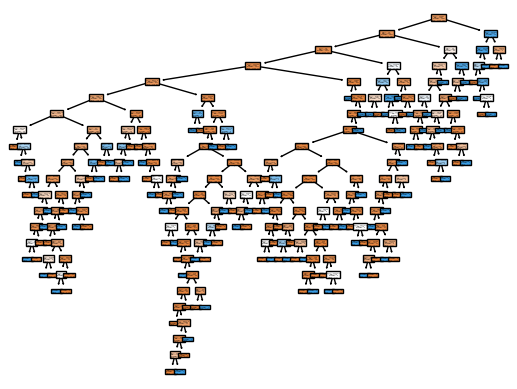

In [38]:
from sklearn.tree import plot_tree

plot_tree(tree,filled=True);

Como no limitamos la profundidas del árbol, podemos observar que el modelo continuó hasta separar correctamente el total de los datos de entrenamiento. Esto implica un overfitting (nunca deseado) y, además, puede significar una gran demanda de tiempo de cálculo.
En comparación del modelo de regresión lineal, podemos observar mejores valores de las métricas.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Se seleccionaron los siguientes  valores para los hiperparámetros principales del DecisionTreeClassifier:
- criterios de partición (criterion): gini, entropy y log_loss
- profundidad máxima del árbol (max_depth): 2, 3, 5, 10 y None
- cantidad mínima de samples por hoja (min_samples_leaf): 1, 2 y 5
- cantidad mínima de muestras por división (min_samples_spli): 2, 5 y 10
- splitter: best y random

Para ello, usamos grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth': [None, 2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5],
    'splitter' : ["best", "random"]
}

grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)

grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

Reportamos accuracy promedio y varianza para todas las configuraciones.


In [42]:
results_tree = grid_search_tree.cv_results_
mean_accuracy_tree = results_tree['mean_test_score']
variance_tree = results_tree['std_test_score'] ** 2
best_params_tree = grid_search_tree.best_params_
best_model_tree = grid_search_tree.best_estimator_
params_tree = results_tree['params']

for mean_acc, var, param in zip(mean_accuracy_tree, variance_tree, params_tree):
    print("Hiperparámetros:", param)
    print(f"Accuracy promedio: {mean_acc:.4f}, Varianza: {var:.4f}")
    print("-----------------------------")


Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy promedio: 0.8625, Varianza: 0.0006
-----------------------------
Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy promedio: 0.8530, Varianza: 0.0006
-----------------------------
Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy promedio: 0.8557, Varianza: 0.0006
-----------------------------
Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy promedio: 0.8739, Varianza: 0.0001
-----------------------------
Hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy promedio: 0.8557, Varianza: 0.0005
-----------------------------


In [43]:
print('Los mejores parametros fueron', best_params_tree)
print('El mejor modelo fue', best_model_tree)

Los mejores parametros fueron {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
El mejor modelo fue DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42,
                       splitter='random')


A partir de la búsqueda de hiperparámetros, se obtuvo que los mejores fueron:
  - criterion: entropy
  - max_depth: 10
  - min_samples_split: 2
  - min_samples_leaf: 1
  - splitter: random

Teniendo esto en cuenta, se evaluó sobre el conjunto de entrenamiento y de validación nuevamente aplicando los mismos:

In [44]:
tree_hyper = best_model_tree
tree_hyper.fit(X_train, y_train)
y_train_pred_hyper = tree_hyper.predict(X_train)
y_test_pred_hyper = tree_hyper.predict(X_test)

In [46]:
train_hyper_acc = accuracy_score(y_train, y_train_pred_hyper)
test_hyper_acc = accuracy_score(y_test, y_test_pred_hyper)

train_hyper_prec = precision_score(y_train, y_train_pred_hyper)
test_hyper_prec = precision_score(y_test, y_test_pred_hyper)

train_hyper_recall = recall_score(y_train, y_train_pred_hyper)
test_hyper_recall = recall_score(y_test, y_test_pred_hyper)

train_hyper_f1 = f1_score(y_train, y_train_pred_hyper)
test_hyper_f1 = f1_score(y_test, y_test_pred_hyper)

train_hyper_conf_mat = confusion_matrix(y_train, y_train_pred_hyper)
test_hyper_conf_mat = confusion_matrix(y_test, y_test_pred_hyper)

print(f'Train accuracy post ajuste: {train_hyper_acc:0.2}, Train accuracy anterior: {train_acc_tree:0.2}')
print(f'Test accuracy post ajuste: {test_hyper_acc:0.2}, Test accuracy anterior: {test_acc_tree:0.2}')
print("\n")
print(f'Train precision post ajuste: {train_hyper_prec:0.2}, Train precision anterior: {train_prec_tree:0.2}')
print(f'Test precision post ajuste: {test_hyper_prec:0.2}, Test precision anterior: {test_prec_tree:0.2}')
print("\n")
print(f'Train hyper recall post ajuste: {train_hyper_recall:0.2}, Train f1 anterior: {train_f1_tree:0.2}')
print(f'Test hyper recall post ajuste: {test_hyper_recall:0.2}, Test f1 anterior: {test_f1_tree:0.2}')
print("\n")
print(f'Train hyper f1 post ajuste: {train_hyper_f1:0.2}, Train recall anterior: {train_recall_tree:0.2}')
print(f'Test hyper f1 post ajuste: {test_hyper_f1:0.2}, Test recall anterior: {test_recall_tree:0.2}')
print("\n")
print('Train hyper confusion matrix post ajuste:')
print(train_hyper_conf_mat)
print('Train confusion matrix anterior:')
print(train_conf_mat_tree)
print("\n")
print('Test hyper confusion matrix post ajuste:')
print(test_hyper_conf_mat)
print('Test confusion matrix anterior:')
print(test_conf_mat_tree)

Train accuracy post ajuste: 0.91, Train accuracy anterior: 1.0
Test accuracy post ajuste: 0.89, Test accuracy anterior: 0.89


Train precision post ajuste: 0.85, Train precision anterior: 1.0
Test precision post ajuste: 0.76, Test precision anterior: 0.64


Train hyper recall post ajuste: 0.57, Train f1 anterior: 1.0
Test hyper recall post ajuste: 0.45, Test f1 anterior: 0.63


Train hyper f1 post ajuste: 0.68, Train recall anterior: 1.0
Test hyper f1 post ajuste: 0.57, Test recall anterior: 0.62


Train hyper confusion matrix post ajuste:
[[1207   25]
 [ 109  142]]
Train confusion matrix anterior:
[[1232    0]
 [   0  251]]


Test hyper confusion matrix post ajuste:
[[305   8]
 [ 32  26]]
Test confusion matrix anterior:
[[293  20]
 [ 22  36]]


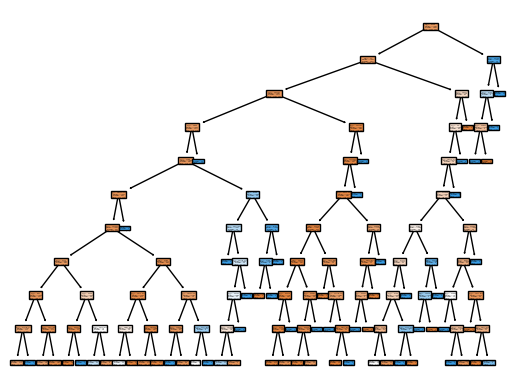

In [ ]:
plot_tree(tree_hyper,filled=True);

Ahora al darle un máximo de 10 en profundidad, es lógico que ni la presición ni la exactitud sean 1 para los datos de entrenamiento (como sí pasaba antes de ajustar los hiperparámetros). Lo bueno de este nuevo modelo es que no tenemos un overfitting. En cuanto a las medidas del modelo en los datos de test, la exactitud se mantuvo, la precisión mejoró; sin embargo, la sensibilidad y, por ende también F1, empeoraron con respecto al modelo anterior.  